# Tugas Mini Project CV
1. Sitti Halimah (Jumatec)
2. Aurora Rahyu Fasya (Jumatec)
3. Millenia Izza Nurul Chasanah (Jumatec)
4. Inayah Fauzul Mona (Jumatec)

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pylab as pl
from PIL import Image

# Data Viewing

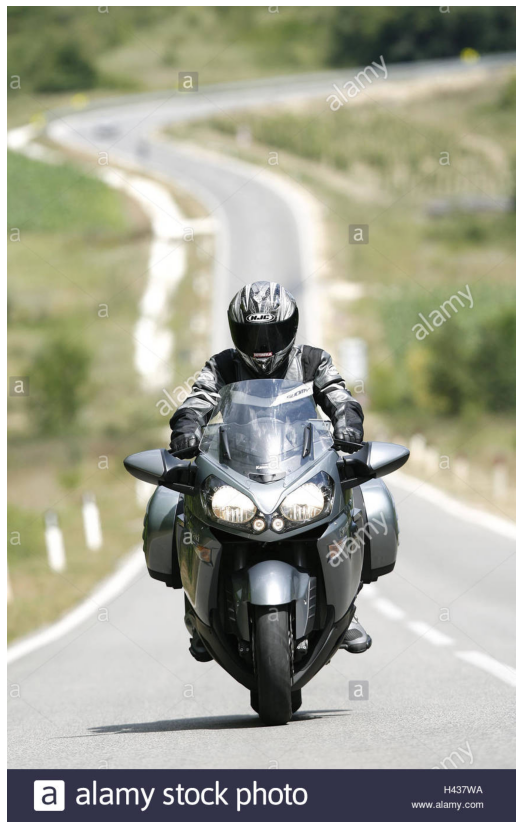

In [2]:
img0 = "../input/detect-person-on-motorbike-or-scooter/dataset/obj/115.jpg"
_ = plt.figure(figsize = (15,15))
_ = plt.axis('off')
_ = plt.imshow(mpimg.imread(img0))

In [3]:
directory = '../input/detect-person-on-motorbike-or-scooter/dataset/obj/'

imagepath=[]
imagefile=[]
boxset=[]
boxfile=[]

for im in os.listdir(directory):
    if im[-4:]=='.jpg':
        path=os.path.join(directory,im)
        imagepath+=[path]
        imagefile+=[im]
        
for im in imagefile:
    if im[-4:]=='.jpg':
        bx=im[0:-4]+'.txt'
        path=os.path.join(directory,bx)
        if os.path.isfile(path):
            bxdata=np.loadtxt(path)
        boxset+=[bxdata]
        boxfile+=[bx]       

In [4]:
print(imagefile[0:5])
print(boxfile[0:5])

['98__flip.jpg', '56__flip.jpg', '140__flip.jpg', '208.jpg', 'IMG_5892.jpg']
['98__flip.txt', '56__flip.txt', '140__flip.txt', '208.txt', 'IMG_5892.txt']


In [5]:
print(len(boxset))
print(len(imagepath))

795
795


In [6]:
num0=0
for i in range(692):
    if imagepath[i]==img0:
        num0=i
        print(i)

67


# YOLO Detection

In [7]:
# for person on bike
weights0_path = '../input/detect-person-on-motorbike-or-scooter/yolov3-obj_final.weights'
configuration0_path = '../input/detect-person-on-motorbike-or-scooter/yolov3_pb.cfg'

probability_minimum = 0.5
threshold = 0.3

In [8]:
network0 = cv2.dnn.readNetFromDarknet(configuration0_path, weights0_path)
layers_names0_all = network0.getLayerNames()
layers_names0_output = [layers_names0_all[i[0]-1] for i in network0.getUnconnectedOutLayers()]
labels0 = open('../input/detect-person-on-motorbike-or-scooter/coco.names').read().strip().split('\n')
print(labels0)

['person_bike']


In [9]:
image_input = cv2.imread(imagepath[num0])
blob = cv2.dnn.blobFromImage(image_input,1/255.0,(416,416),swapRB=True,crop=False)
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
network0.setInput(blob)
#network1.setInput(blob)
output_from_network0 = network0.forward(layers_names0_output)
#output_from_network1 = network1.forward(layers_names1_output)
np.random.seed(42)
colours0 = np.random.randint(0,255,size=(len(labels0),3),dtype='uint8')
#colours1 = np.random.randint(0,255,size=(len(labels1),3),dtype='uint8')

print(colours0)
#print(colours1)

[[102 220 225]]


In [10]:
bounding_boxes0 = []
confidences0 = []
class_numbers0 = []

bounding_boxes1 = []
confidences1 = []
class_numbers1 = []

h,w = image_input.shape[:2]

for result in output_from_network0:
    for detection in result:
        scores = detection[5:]
        class_current=np.argmax(scores)
        confidence_current=scores[class_current]
        if confidence_current>probability_minimum:
            box_current=detection[0:4]*np.array([w,h,w,h])
            x_center,y_center,box_width,box_height=box_current.astype('int')
            x_min=int(x_center-(box_width/2))
            y_min=int(y_center-(box_height/2))
            
            bounding_boxes0.append([x_min,y_min,int(box_width),int(box_height)])
            confidences0.append(float(confidence_current))
            class_numbers0.append(class_current)
                     

In [11]:
results0 = cv2.dnn.NMSBoxes(bounding_boxes0,confidences0,probability_minimum,threshold)

if len(results0) > 0:
    for i in results0.flatten():
        x_min,y_min=bounding_boxes0[i][0],bounding_boxes0[i][1]
        box_width,box_height= bounding_boxes0[i][2],bounding_boxes0[i][3]
        colour_box_current=[int(j) for j in colours0[class_numbers0[i]]]   
        cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,5)
        text_box_current0='{}: {:.4f}'.format(labels0[int(class_numbers0[i])],confidences0[i])
        cv2.putText(image_input,text_box_current0,(x_min,y_min-7),cv2.FONT_HERSHEY_SIMPLEX,1.5,colour_box_current,5)

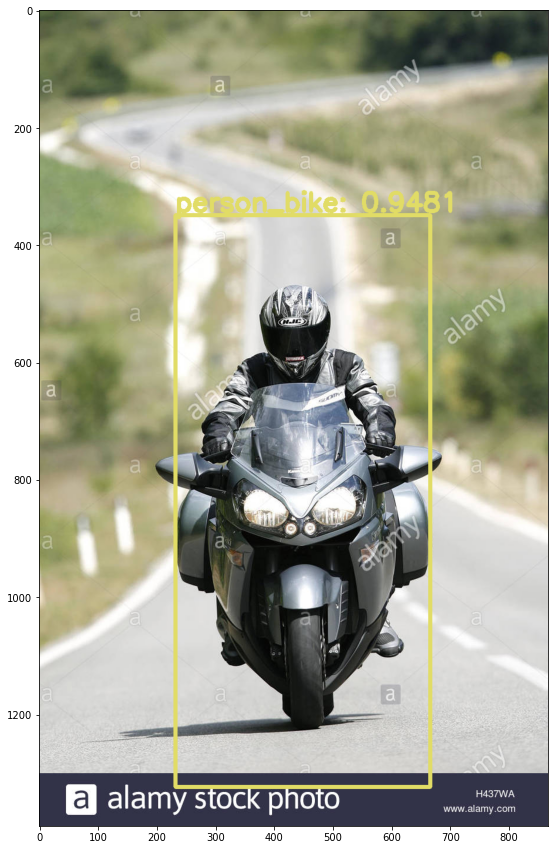

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0,15.0)
plt.imshow(cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB))
plt.show()